<a href="https://colab.research.google.com/github/saspav/DA-104/blob/main/%D0%9F%D0%B0%D0%B2%D0%BB%D0%BE%D0%B2%D0%B0_%D0%A1%D0%92_%D0%9F%D0%B0%D1%80%D1%81%D0%B8%D0%BD%D0%B3_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D1%81_%D1%81%D0%B0%D0%B9%D1%82%D0%BE%D0%B2_%D0%BD%D0%B0_Python_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_%D0%B1%D0%B8%D0%B1%D0%BB%D0%B8%D0%BE%D1%82%D0%B5%D0%BA_Selenium_%D0%B8_BeautifulSoup_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1

Написать код, который выполнит ввод слова "Lenovo" в поисковую строку сайта  nbcomputers.ru (https://www.nbcomputers.ru/) и нажмет кнопку "Найти"
<br>
<br>
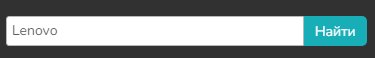

*(подсказка: изучите внимательно документацию и метод send_keys)*

In [1]:
__import__('warnings').filterwarnings("ignore")

!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys

sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Hit:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:4 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu180

In [2]:
from time import sleep
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys


# Установка параметров для headless браузера 
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument("--window-size=1920,1080")

# Инициализация сессии браузера 
# browser = webdriver.Chrome(executable_path='/usr/bin/chromedriver', options=options)
# выдает предупреждение: DeprecationWarning: executable_path has been deprecated
browser = webdriver.Chrome(options=options)

# В новой версии сайта нет кнопки "Найти"
link = "https://www.nbcomputers.ru/"
browser.get(link)
html_source = browser.page_source
while "ant-input-sm" not in html_source:
    sleep(1)
browser.find_element(By.CLASS_NAME, "ant-input-sm").send_keys("Lenovo" + Keys.RETURN)
browser.quit()

# Задание 2

Соберите информацию с сайта nbcomputers.ru (https://1000kem.ru/catalog/vse_dlya_doma_1/) о домашней утвари данного интернет-магазина.
<br>
Данные, которые необходимы:
* Название товара
* Цена

Так же данные должны быть отсортированы по уменьшению цены.
<br>
Результат необходимо записать в CSV файл.
<br>
*(совет: обязательно делайте различные временные промежутки между прокликами)*

In [3]:
import pandas as pd
from time import sleep
from random import random
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support.expected_conditions import \
    presence_of_all_elements_located as elem_loc


def wait_load_page(seconds=1):
    driver_wait.until(elem_loc((By.CLASS_NAME, "catalog_section_description")))
    sleep(seconds + seconds * random())


url = "https://1000kem.ru/catalog/vse_dlya_doma_1/?alfaction=coutput&alfavalue=80"

# Установка параметров для headless браузера 
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument("--window-size=1920,1080")

# Инициализация сессии браузера 
browser = webdriver.Chrome(options=options)

browser.get(url)
driver_wait = WebDriverWait(browser, 13)
wait_load_page()
# Установка сортировки по убыванию
browser.find_elements(By.CSS_SELECTOR, ".asc.icon.multimage_icons")[-1].click()
wait_load_page()

df = pd.DataFrame(columns=['Название товара', 'Цена'])
while True:
    link = browser.current_url
    page = link.split('=')[-1] if '=' in link else 1
    print(f'Страница: {page}')

    # получение списка товаров
    items = browser.find_elements(By.CLASS_NAME, "catalog-item_inner")
    for item in items:
        # извлечение наименования и цены
        row = item.text.split('\n')
        name = row[0] if row else ''
        price = row[1] if len(row) > 1 else ''
        price = int(price.replace('руб.', '').replace(' ', ''))
        df.loc[len(df)] = [name, price]

    # если существует кнопка "перейти на след страницу"
    if browser.find_elements(By.CLASS_NAME, "modern-page-next"):
        browser.find_element(By.CLASS_NAME, "modern-page-next").click()
        wait_load_page(2)
    else:
        break

    # сохраняем ДФ после парсинга каждой страницы
    df.sort_values('Цена', ascending=False, inplace=True)
    df.to_csv('домашняя_утварь.csv', index=False)

Страница: 1
Страница: 2
Страница: 3
Страница: 4
Страница: 5
Страница: 6
Страница: 7
Страница: 8
Страница: 9
Страница: 10
Страница: 11
Страница: 12
Страница: 13
Страница: 14
Страница: 15
Страница: 16
Страница: 17
Страница: 18
Страница: 19
Страница: 20
Страница: 21
Страница: 22
Страница: 23
Страница: 24
Страница: 25
Страница: 26
